# *Soluções numéricas para as órbitas de Schwarzchild*

### Introdução

As órbitas materiais na métrica de Schwarzchild descrevem justamente a trajetória de uma partícula que orbita uma estrela (estacionária e sem rotação) muito mais massiva que essa partícula. Pela diferença de apenas um termo relativístico na equação do potencial efetivo clássico, as órbitas de Schwazrchild podem ter um tipo especial que não pode ocorrer na gravitação de Newton. Esse tipo orbital descreve justamente o movimento de Mercúrio ao redor do Sol. Nesse caderno iremos usar de métodos numéricos para ilustrarmos esse e os outros tipos de órbita.

No cálculo das geodésicas da métrica de Schwarzchild, encontramos duas constantes no movimento $E$ e $L$ das partículas na região do espaço-tempo tal que $r>2GM$, associadas às coordenadas $t$ e $\phi$, respectivamente. Além disso, pela equação associada à coordenada $\theta$, temos que uma reparametrização conveniente nos dá que as órbitas de Schwazrchild são restritas a um plano além de obedecerem a seguinte equação:

$$E^2 = \bigg(\frac{dr}{d\tau}\bigg)^2 + \bigg(1+\frac{L^2}{r^2}\bigg)\bigg(1 - \frac{2M}{r}\bigg)$$

Comparando com mecânica clássica, podemos renomear o termo com à direita que está sendo somado com a derivada de $r$ ao quadrado como o nosso potencial efetivo relativístico $V(r)$, i.e.:

$$V(r) = 1- \frac{2GM}{r} + \frac{L^2}{r^2} - \frac{2GML^2}{r^3}$$

*Explicitamos a constante gravitacional $G$ afim apenas de ilustrarmos a semelhança com o caso clássico, afinal a equação acima já assumia unidades naturais, ou seja, $G=c=1$

Diferenciando a nossa primeira equação (eq. da Energia), notamos a seguinte igualdade:

$$\frac{d^2r}{d\tau^2} \frac{dr}{d\tau} = \frac{-V'(r)}{2} \frac{dr}{d\tau} \Rightarrow \frac{d^2r}{d\tau^2} = \frac{-V'(r)}{2}$$

Para $\frac{dr}{d\tau} \neq 0$

Assim, o estudo das órbitas dessa partícula, pode ser feito pelo estudo do potencial efetivo relativístico, que por sua vez é essencialmente caracterizado pela magnitude relativa entre as grandezas $M$ e $L$.

## Potencial Efetivo

O potencial efetivo dado pela equação 2 é uma função cuja forma é dada pela grandeza $L/M$. Perceba que nos interessamos pela "forma" da função já que para a aceleração radial usamos apenas a derivada do potencial, nos interessando então apenas a inclinação desse gráfico. Com isso em mente podemos graficar como varia o gráfico de $V(r)$ a medida que $L/M$ cresce, para construirmos uma intuição sobre esse tipo de problema:

In [3]:
#Biblioteca numérica que nos permite lidar com listas mais facilmente
import numpy as np

#Lista de valores para r entre [2=2GM,30]
r = np.linspace(2, 30, 100)

#Lista de valores de L para variarmos na função potencial
L = np.linspace(2, 5, 100)

#função potencial
def V(r, l):
    """ Calculando o potencial efetivo usando que M=1 """
    return (1 - 2/r + l**2/(r**2) - 2*l**2/(r**3))

In [16]:
#Biblioteca e classes para graficarmos e animarmos o grafico
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import time

#Parametros gerais da figura
plt.style.use('seaborn-pastel')
fig = plt.figure() 
ax = plt.axes(xlim=(1.9, 30), ylim=(0, 2)) 
line, = ax.plot([], [], lw=3)
plt.close(fig)


#Funções para a animação
def init():
    line.set_data([], [])
    return line
def animate(i):
    r = np.linspace(2, 30, 100)
    y = V(r,L[i])
    line.set_data(r, y)
    return line


#Chamamos a animação
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=False)

#Salvando a animação
anim.save('potencial.gif', writer='pillow')

Animando a variação de V(r) com a variação de L/M entre 2 e 5:

![SegmentLocal](potencial.gif "potencial")


Vendo a animação fica mais claro que existem basicamente três tipos de potencial efetivo. Plotando esses três momentos em um gráfico só, temos:

<Figure size 432x288 with 0 Axes>

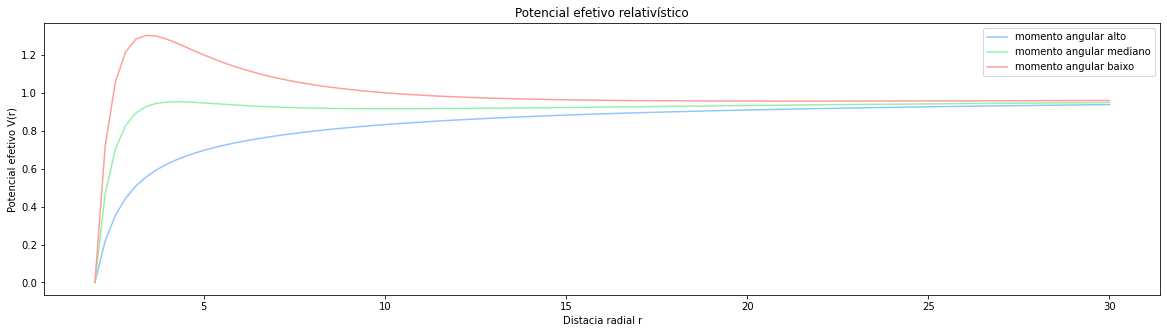

In [17]:
fig = plt.figure() 
fig_size = 10
plt.figure(figsize=(2*fig_size, 0.5*fig_size))
   
    # momento baixo
plt.subplot
plt.plot(r, V(r, 2) , label="momento angular alto")
    
    # momento médio
plt.subplot
plt.plot(r, V(r, 3.8), label="momento angular mediano")
    
    # momento alto
plt.subplot
plt.title("Potencial efetivo relativístico")
plt.plot(r, V(r, 5), label=r"momento angular baixo")

plt.xlabel("Distacia radial r")
plt.ylabel("Potencial efetivo V(r)")
plt.legend()


Note que nos três casos a derivada é positiva para valores baixos de $r$, porém a medida que $r$ cresce temos três casos diferentes:

Enquanto os casos de momento angular alto e mediano permitem sistemas de "poço de potencial", o caso com momento angular baixo só permite sistemas de barreira de potencial ($E < 1$) ou um sistema livre. Para visualizarmos essas órbitas mais facilmente, podemos de fato traçar as trajetórias desses casos mencionados, para isso faremos o uso de ferramentas do cálculo númerico.

#### Reparametrizações

Antes de continuarmos diretamente para o cálculo numérico do problema, faremos uma reparametrização das variáveis a fim de tratarmos com grandezas adimensionais por todo o processo.

Primeiramente lembramos que estamos usando as unidades naturais no qual $G=c=1$. Além disso definiremos duas novas unidades:

$$\rho = \frac{r}{2GM}$$ 

$$T = \frac{t}{t_0}$$

Onde $2GM$ é o famoso raio de Schwarzchild e $t_0$ é algum tempo característico que a princípio poderia ter qualquer valor (poderíamos usar algum processo térmico da estrela, por exemplo) mas que usaremos o tempo tal que $t_0 = 2GM$ nas unidades naturais. Além disso lembramos que a equação das órbitas deve ser restrita a um plano e assim usaremos duas coordenadas independentes para plotarmos suas órbitas. Assim $\rho = (x,y)$. Com isso em mente, nossa equação diferencial torna-se:


$$\frac{d^2x}{dT^2} = \frac{-x}{2\rho^2}\bigg(1+\frac{3l^2}{\rho^2}\bigg)$$

$$\frac{d^2y}{dT^2} = \frac{-y}{2\rho^2}\bigg(1+\frac{3l^2}{\rho^2}\bigg)$$

Assim podemos usar implementações numéricas para calcularmos tais derivadas e finalmente poderemos plotar os gráficos

# Cálculo numérico

Como estamos tratando da derivada segunda de duas coordenadas, podemos usar método de derivação numérica Runge-Kutta para encontrarmos as funções coordenadas. Para isso denotaremos $u = \frac{dx}{dT}$ e $v = \frac{dy}{dT}$, para as derivadas e nomearemos as constantes $A=1/2$ e $B= 3l^2$ a fim de simplificarmos a função derivada:

In [8]:
def constB(x, y, u, v):
    """ calcula a constante B """
    l2 = (x*v - y*u)**2 
    return 3*l2

def constA():
    """ calcula a constante A """
    return .5

def RHS(Z, A, B):
    """ calcula as derivadas de Z = x, y, u, v. segundo a ultima equação encontrada """
    
    rho = np.sqrt(Z[0]**2 + Z[1]**2)
    correction = 1 + B/rho**2
    dUdtau = -A*Z[0]/rho**3*correction
    dVdtau = -A*Z[1]/rho**3*correction
    
    return np.array([Z[2], Z[3], dUdtau, dVdtau])

def rk4step(f, y, h, A, B):
    """o método runge-kutta calcula o próximo instante dada a equação diferencial e valores iniciais que calculamos com a função acima
    parametros usados:
        f: função igual às derivadas.
        y: posição atual.
        h: intervalo.
        A: constante 0.5
        B: constante do momento angular
    parametros entregues:
        próximo passo.
    """
    
    s1 = f(y, A, B)
    s2 = f(y + h*s1/2.0, A, B)
    s3 = f(y + h*s2/2.0, A, B)
    s4 = f(y + h*s3, A, B)
    
    return y + h/6.0*(s1 + 2.0*s2 + 2.0*s3 + s4)

In [18]:
def Orbita(n, T_max, Z0):
    """ calcula a orbita da particula usando o runge-kutta
    parametros usados:
        n     : numero de interações do programa
        T_max : tempo final
        Z0    : lista quadridimensional com as posições e velocidades iniciais
                Z0 = [x, y, u, v]
    parametros entregues:
        Z     : lista quadridimensional com as posições e velocidades completas
                [x[], y[], u[], v[]] 
    """
    B = constB(*Z0)
    print("Correção relativística: %.2e"%(B))
    A = constA()
    
    h = T_max/float(n)
    Z = np.zeros((4, n + 1))
    Z[:, 0] = Z0

    tic = time.time()
    for i in range(0, n):
        Z[:, i + 1] = rk4step(RHS, Z[:, i], h, A, B)
    print("%.5f s, tempo corrido com %i passos."% (time.time() - tic, n))
    
    return Z

In [19]:
def plotOrbit(Z):
    """ plota o traçado da órbita e a o potencial associado.
    parametros usados:
        Z: Z = [x[], y[], u[], v[]]
    parametros entregues: 
        os gráficos
    """
    plt.figure(figsize=(2*fig_size, fig_size))

    rho = (Z[0, :]**2 + Z[1, :]**2)**.5
    l = Z[0, :]*Z[3, :] - Z[1, :]*Z[2, :]
    
    # Trajetoria
    ax = plt.subplot(2, 2, (1, 3))
    plt.title("Órbita")
    ax.plot(Z[0, :], Z[1, :], label="Trajetória")
    plt.xlabel(r"$x$")
    plt.ylabel(r"$y$")
    ax.plot(0, 0, ".", label="Centro de massa")
    ax_lim = max(Z[0, 0], Z[1, 0])
    plt.xlim([-1.1*ax_lim, 1.1*ax_lim])
    plt.ylim([-1.1*ax_lim, 1.1*ax_lim])
    plt.legend()
    
    # Potencial
    plt.subplot(2, 2, (2, 4))
    plt.title("Potencial efetivo")
    r = np.linspace(1.5, 100, 500)
    plt.plot(r, V(r, l[0]), label="Potencial efetivo")
    plt.xlim([0, 100])
    plt.ylim([0, 1.25])
    plt.xlabel(r"$\rho$")
    plt.ylabel(r"$V$")
    plt.legend()
    
    plt.show()

In [20]:
def animação(Z, j, t):
    
    fig = plt.figure() 
    ax = plt.axes(xlim=(-11, 11), ylim=(-11, 11))
    plt.title("Órbita")
    plt.xlabel(r"$x$")
    plt.ylabel(r"$y$")
    ax.plot(0, 0, ".", label="Centro de massa da estrela")
    ax_lim = max(Z[0, 0], Z[1, 0])
    plt.xlim([-1.1*ax_lim, 1.1*ax_lim])
    plt.ylim([-1.5*ax_lim, 1.1*ax_lim])
    plt.legend()
    plt.close(fig)

    def init():
        line.set_data([], [])
        return line,
    def animate(i):
        x = Z[0,0:t*i]
        y = Z[1,0:t*i]
        ax.plot(x[:], y[:], label="Orbit")
        line.set_data(x, y)
        return line,

    anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=False)

    anim.save('orb%.f.gif'%j, writer='imagemagick')

# Tipos de órbitas

Agora em posse das derivações numéricas podemos construir as diversas órbitas que comentamos no início do caderno:

## Órbitas de colisão




Correção relativística: 1.02e+01
0.30077 s, tempo corrido com 5000 passos.


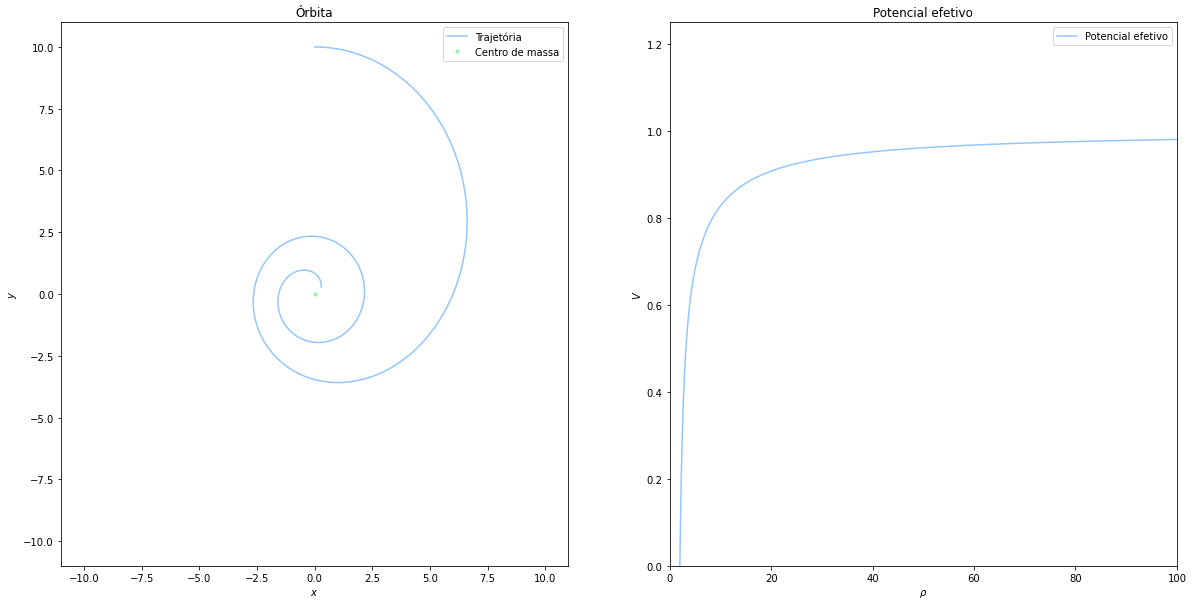

MovieWriter imagemagick unavailable; using Pillow instead.


In [21]:
Z0 = [0, 10, .1845, 0]
Z = Orbita(5000, 102.8, Z0)
plotOrbit(Z)
animação(Z, 1, 30)

![SegmentLocal](orb1.gif "1")

## Órbitas fechadas

No caso das órbitas fechadas temos dois tipos, as órbita circulares e as órbitas de precessão:

Correção relativística: 1.77e+01
0.30692 s, tempo corrido com 5000 passos.


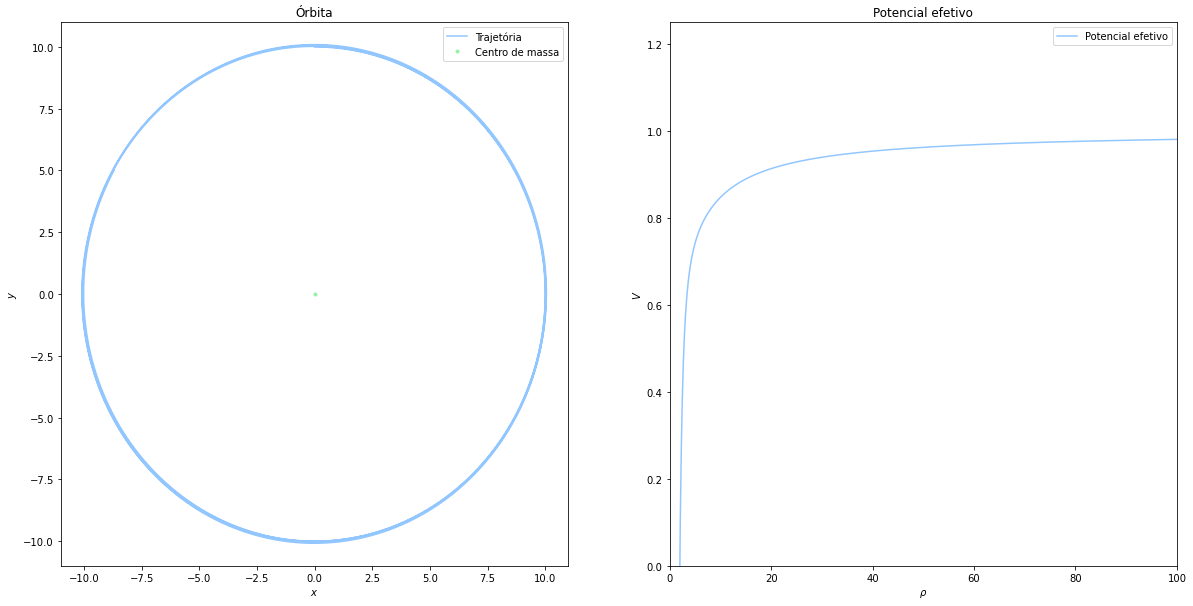

MovieWriter imagemagick unavailable; using Pillow instead.


In [22]:
Z0 = [0, 10, .243, .0]
Z = Orbita(5000, 1000, Z0)
plotOrbit(Z)
animação(Z, 2, 7)

![SegmentLocal](orb2.gif "2")

Correção relativística: 1.08e+01
0.30058 s, tempo corrido com 5000 passos.


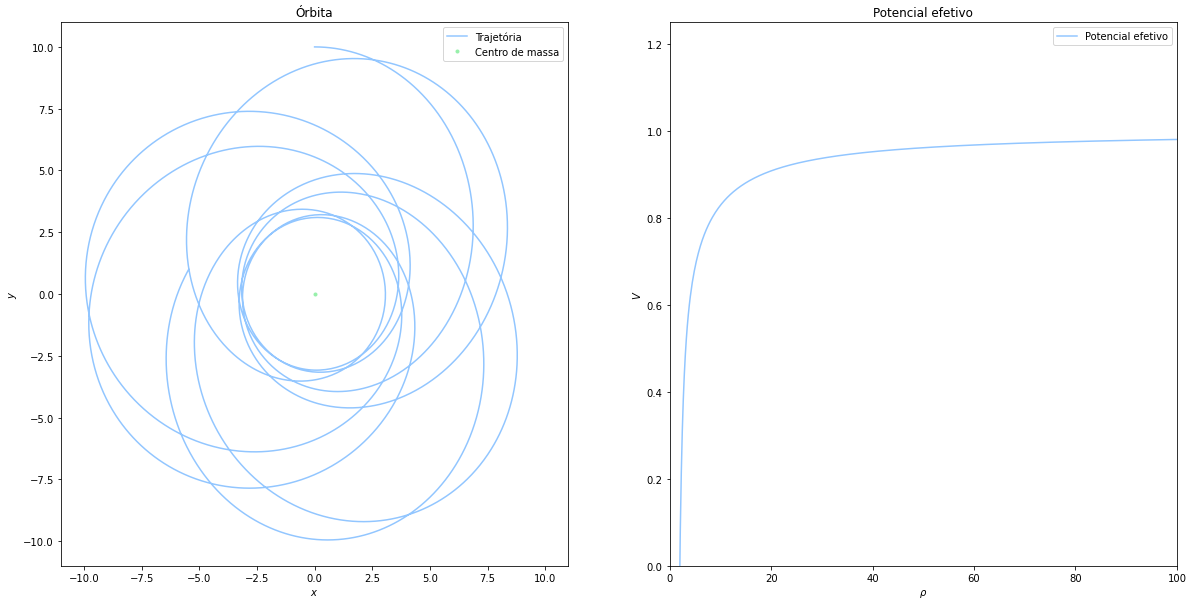

MovieWriter imagemagick unavailable; using Pillow instead.


In [23]:
Z0 = [0, 10, .19, -0]
Z = Orbita(5000, 1000, Z0)
plotOrbit(Z)
animação(Z, 3, 20)


![SegmentLocal](orb3.gif "3")

## Órbitas de aproximação

Para essas órbitas temos as órbitas que completam um ciclo na estrela, ou as de simples "fly-by":

Correção relativística: 4.56e+01
0.30073 s, tempo corrido com 5000 passos.


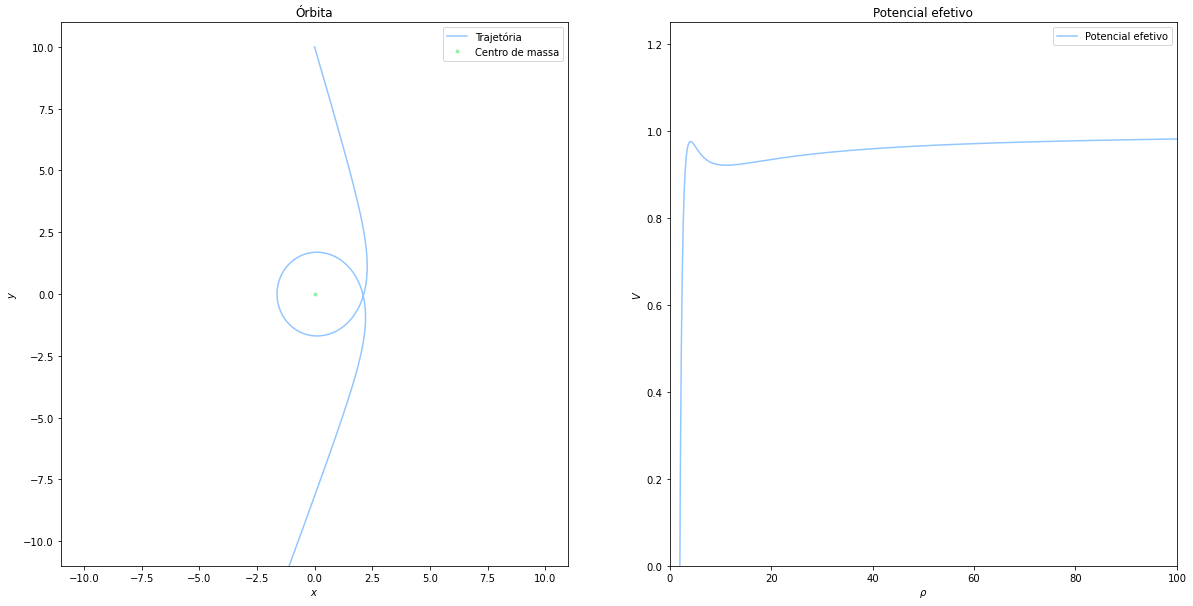

MovieWriter imagemagick unavailable; using Pillow instead.


In [24]:
Z0 = [0, 10, 0.39, -1.25]
Z = Orbita(5000, 200, Z0)
plotOrbit(Z)
animação(Z, 4, 5)


![SegmentLocal](orb4.gif "4")

Correção relativística: 4.80e+01
0.26941 s, run time with 5000 steps.


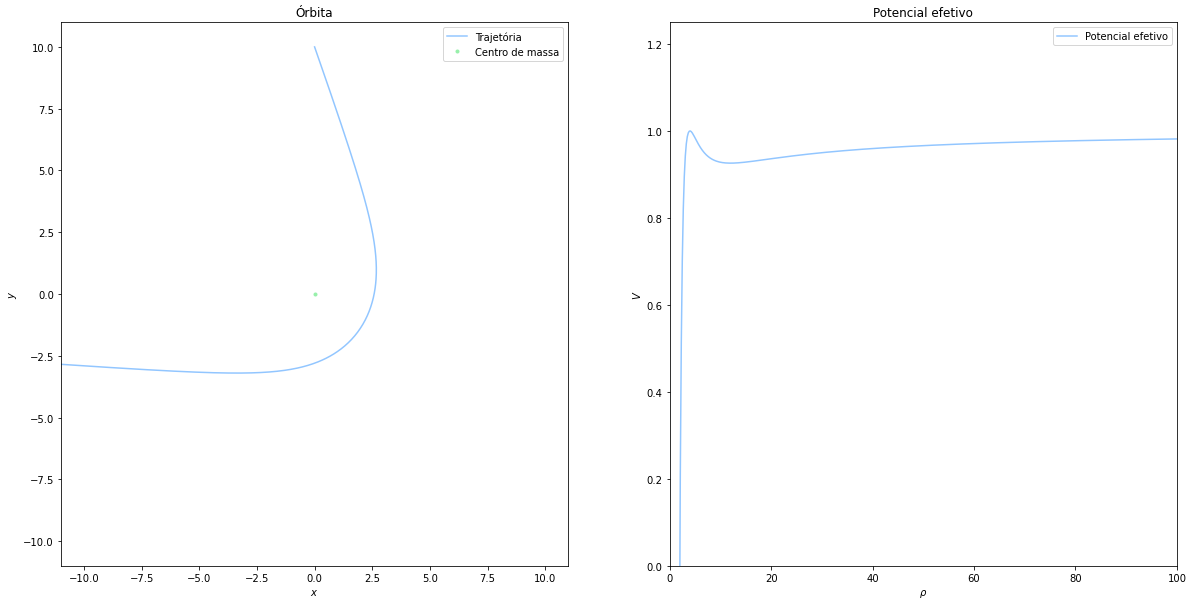

MovieWriter imagemagick unavailable; using Pillow instead.


In [182]:
Z0 = [0, 10, 0.4, -1.07]
Z = Orbita(5000, 200, Z0)
plotOrbit(Z)
animação(Z, 5, 3)

![SegmentLocal](orb5.gif "5")

## Conclusão

Com um tratamento puramente numérico pudemos construir as diversas órbitas possíveis no espaço-tempo de Schwarzchild. É notável apontar que enquanto as órbitas de aproximação conseguem descrever a trajetória de asteróides passando perto do sol e as órbitas de colisão descrevem tais corpos celestes que são engolidos pelo astro, são as órbitas fechadas que se destacam. Como dito anteriormente, a órbita de precessão descreve com acurácia o movimento de Mercúrio, enquanto a única órbita fechada possível na gravitação de Newton são as órbitas circulares. Assim, esse caderno ajuda a ilustrar a vantagem preditiva da relatividade geral de Einstein sob a secular mecânica clássica. Seguindo esse caminho é de interesse do autor tentar usar os mesmos métodos numéricos no futuro para tentar descrever as partículas sem massa, fora e dentro do raio de Schwarzchild a fim de explorar um pouco mais as vantagens que tais simulações podem trazer para o entendimento de tal métrica. Além disso, espero que o texto tenha sido claro o suficiente para que o leitor possa o utilizar para justamente construir as órbitas clássicas e ver com seus próprios gráficos as limitações da teoria. 

## Referências 

Fundamentação teórica dos argumentos usados nesse caderno:


[1] Shlomo Sternberg, Semi-Riemann Geometry and General Relativity<br>
[2] Barrett O'Neill, Semi-Riemannian Geometry: With Applications to Relativity<br>
[3] Subramanyan Chandrasekhar, The Mathematical Theory of Black Holes

Fundamentação computacional usada nesse caderno:

[4] aulas de computação para a física https://nbviewer.jupyter.org/github/tavo-buk/icfis/tree/master/<br>
[5] python para físicos https://www.numfys.net/ 